<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/python/Coin_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install pyupbit
!pip install pykrx

In [149]:
import pyupbit
from pykrx import stock
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [150]:
# BTC 최근 200시간의 데이터 불러옴

df = pyupbit.get_ohlcv("KRW-bat", interval="minute240")

In [151]:
# 시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds', 'y']]

In [153]:
#학습
#튜닝 전
# model = Prophet()
# model.fit(data)


#학습
#튜닝 후
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.9,
    changepoint_range=0.9,
)
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [154]:
#24시간 예측
future = model.make_future_dataframe(periods=30, freq='H')

forecast = model.predict(future)

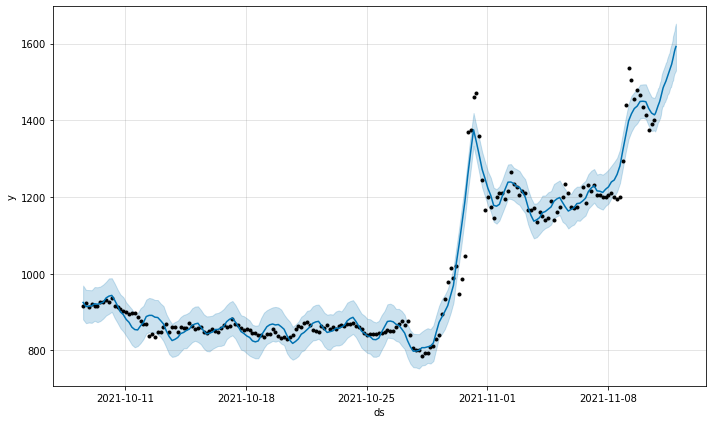

In [155]:
# 그래프1
fig1 = model.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), model, forecast)

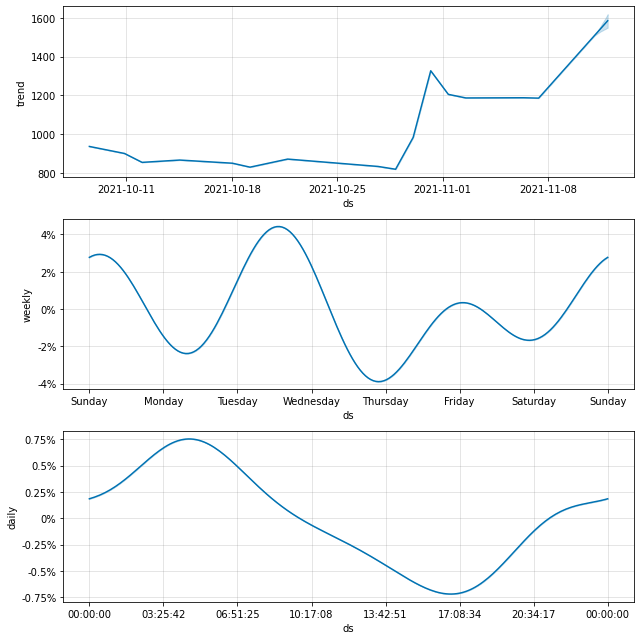

In [156]:
# 그래프2
fig2 = model.plot_components(forecast)